1. Importing libraries

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

2. Loading dataset

In [ ]:
uploaded = files.upload()

Saving HomeTest 1 - KPMG Data.xlsx to HomeTest 1 - KPMG Data.xlsx


In [ ]:
data = pd.read_excel("HomeTest 1 - KPMG Data.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

3. Filtering approved orders_status, removing dups and null customer_ids

In [ ]:
final_data = data[(data['order_status'] == 'Approved')]

In [ ]:
final_data = final_data.drop_duplicates()
final_data = final_data.dropna(subset=['customer_id'])
final_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


4. Creating "order_month" column

In [ ]:
# Creating a function to get month from transaction_date
def get_month(m):
  return dt.datetime(m.year, m.month, 1)

In [ ]:
# Creating "order_month" column
final_data['order_month'] = final_data['transaction_date'].apply(get_month)

5. Creating "CohortMonth" column - 1st month to visit

In [ ]:
final_data['CohortMonth'] = final_data.groupby('customer_id')['order_month'].transform('min')
final_data.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month,CohortMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


6. Creating a Column Index

In [ ]:
# Function for data to create a series of day, month, year
def get_date_int(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [ ]:
# Getting the integers for date parts from the 'order_month' column
transcation_year, transaction_month, _ = get_date_int(final_data, 'order_month')
# Getting the integers for date parts from the 'CohortMonth' column
cohort_year, cohort_month, _ = get_date_int(final_data, 'CohortMonth')

7. Creating the Cohort Index

In [ ]:
year_diff = transcation_year - cohort_year
month_diff = transaction_month - cohort_month
final_data['CohortIndex'] = year_diff * 12 + month_diff  + 1
final_data.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


8. Creating the Pivot Table

In [ ]:
#Counting customer_id by grouping by CohortMonth and CohortIndex
cohort_data = final_data.groupby(['CohortMonth','CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1347
1,2017-01-01,2,483
2,2017-01-01,3,505
3,2017-01-01,4,499
4,2017-01-01,5,492
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,8
75,2017-11-01,1,13
76,2017-11-01,2,5


In [ ]:
#Creating a pivot table
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'], values='customer_id')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02-01,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03-01,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04-01,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05-01,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06-01,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9. Visualizing the result in heatmap

In [ ]:
#Setup cohort_sizes + retention
cohort_size = cohort_table.iloc[:,0]
retention = cohort_table.divide(cohort_size, axis=0)

In [ ]:
# Creating retention index
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

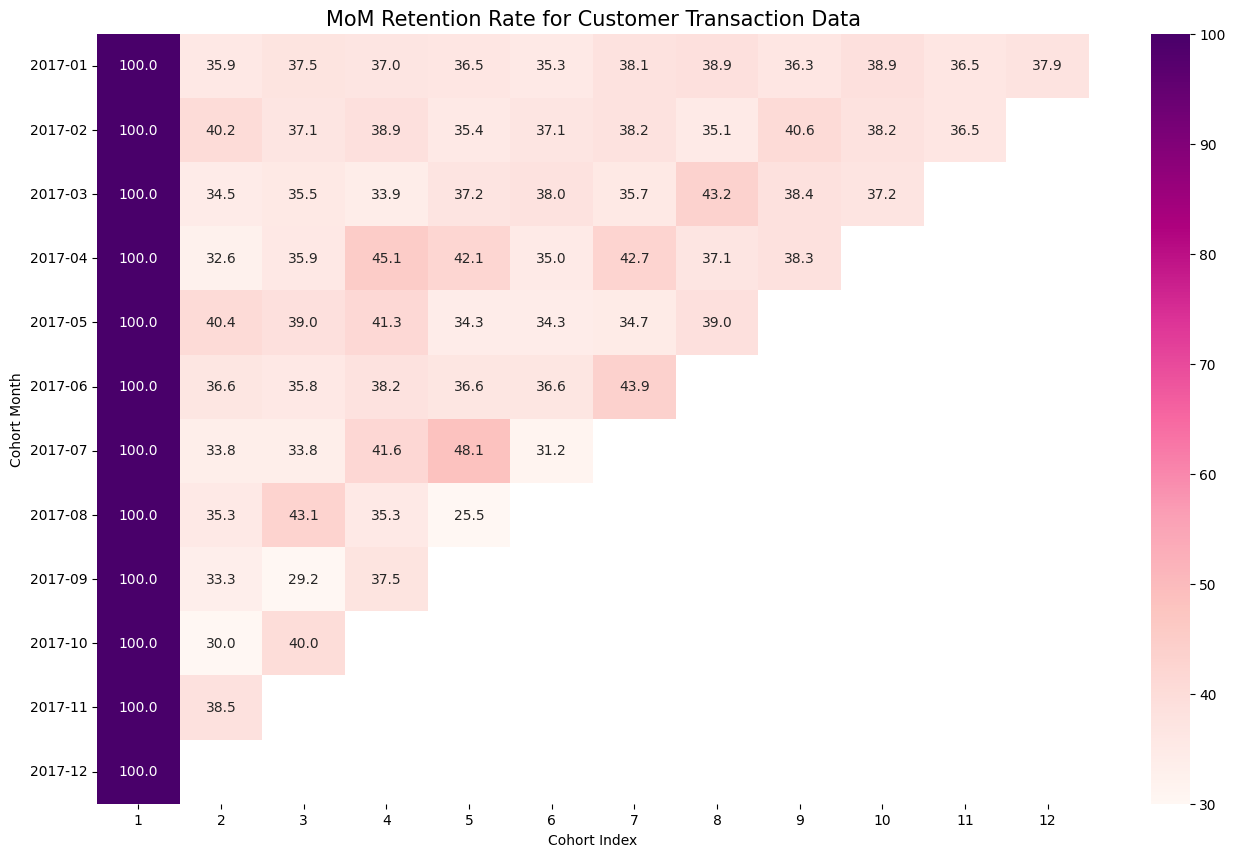

In [ ]:
# Setup the figure size
plt.figure(figsize=(16, 10))

# Adding title for cohort chart
plt.title('MoM Retention Rate for Customer Transaction Data', fontsize = 15)

# Creating the cohort chart
sns.heatmap((retention*100).round(1), annot=True, fmt= '', cmap='RdPu', vmin = 30 , vmax = 100)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation='horizontal')
plt.show()

10. Insights
- KPMG's month-over-month retention rate is good (greater than or equal to 30% except 25.5% in Aug 2017)
- Customers visiting firstly in July 2017 have the highest retention rate in 2017 (up to 48.1%) after 5 months of engagement.
- Customers visiting firstly in mid-year (from Apr-2017 to Aug-2017) tend to have stable and higher retention rate compared to the rest months of the year

In details:
+ Retention rate in Apr-2017: 45.1% (4-month engagement), 42.1% (5-month) and 42.7% (7-month)
+ Retention rate in May-2017: 40.4%, 39%, and 41.3% in the 2-month, 3-month and 4-month engagements

